In [1]:
%load_ext autoreload
%autoreload 2

## (Strategy Proofness - First Order Stochastic Dominance)
$$
\forall i\in W\cup F \ \forall \succ_i \forall \succ_{-i} \forall \succ'_i \forall j \\
\sum_{j'\succeq j}(g_{ij'}(\succ'_i,\succ_{-i})-g_{ij'}(\succ_i,\succ_{-i})) \leq 0
$$

## (Ex-ante Stability)
$\nexists (w,f)\in W\times F$ s.t. $\exist f'\ [g_{wf'}(\succ)>0\land f\succ_w f']\ \exist w'\ [g_{w'f}(\succ)>0\land w\succ_f w']$

## (Stability of Deterministic Matching)
$$
\forall (w,f)\in W\times F \ g_{wf}+\sum_{f'\succ_w f}g_{wf'}+\sum_{w'\succ_f w}g_{w'f}\geq 1
$$

## (Ex-post Stability)
A randomized matching is **ex-post stable** iff it can be decomposed into deterministic stable matchings.

## (Fractionally Stable)
$$
\forall (w,f)\in W\times F \ g_{wf}+\sum_{f'\succ_w f}g_{wf'}+\sum_{w'\succ_f w}g_{w'f}\geq 1
$$

### (Violation of Fractionally Stability)
$$
\sum_\succ\sum_w\sum_f\max\left\{0,1-g_{wf}(\succ)-\sum_{w'\succ_f w}g_{w'f}(\succ)-\sum_{f'\succ_w f}g_{wf'}(\succ)\right\}
$$

## (Primal)
$$
\begin{align*}
    \min & \sum_\succ\sum_w\sum_f t_{wf}(\succ)\\
    \text{s.t.} & \sum_f g_{wf}(\succ)\leq 1 & \forall\succ\forall w \\
    & \sum_w g_{wf}(\succ)\leq 1 & \forall \succ\forall f\\
    & t_{wf}(\succ)\geq 1-g_{wf}(\succ)-\sum_{w'\succ_f w}g_{w'f}(\succ)-\sum_{f'\succ_w f}g_{wf'}(\succ) & \forall\succ\forall w\forall f\\
    & \sum_{f'\succ_wf}(g_{wf'}(\succ_w',\succ_{-w})-g_{wf'}(\succ))\leq 0 & \forall\succ\forall w\forall\succ_{w}'\forall f\\
    & \sum_{w'\succ_fw}(g_{w'f}(\succ_f',\succ_{-f})-g_{w'f}(\succ))\leq 0 & \forall\succ\forall f\forall\succ_{f}'\forall w\\
    & g_{wf}(\succ)\geq 0,\ t_{wf}(\succ)\geq 0 & \forall\succ\forall w \forall y
\end{align*}
$$



efficient_loss:

$M = 効率的なマッチングの集合$ とした時、そのマッチング$\mu$におけるefficiency_lossは
$$
\min_{\nu \in M} \sum_{p \in P} \sum_{q \in Q}  (\sum{}\nu())

$$

## (Dual)
$$
\begin{align*}
    \min & \sum_\succ\left(\sum_wx_w(\succ)+\sum_fy_f(\succ)-\sum_w\sum_fz_{wf}(\succ)\right)\\
    \text{s.t.}  \\
    & \forall \succ \forall w \forall f\\
    & x_w(\succ)+y_f(\succ)-z_{wf}(\succ)-\sum_{f'\prec_wf}z_{wf'}(\succ)-\sum_{w'\prec_fw}z_{w'f}(\succ)-\sum_{\succ_w'}\left(\sum_{f'\prec_w f}u_{wf'}(\succ_w',\succ_w,\succ_{-w})-\sum_{f'\prec_w'f}u_{wf'}(\succ_w,\succ_w',\succ_{-w})\right)-\sum_{\succ_f'}\left(\sum_{w'\prec_fw}v_{w'f}(\succ_f',\succ_f,\succ_{-f})-\sum_{w'\prec_f'w}v_{w'f}(\succ_f,\succ_f',\succ_{-f})\right)\geq 0 & \forall\succ\forall w\forall f\\
    & x_w(\succ)\geq 0,\ y_f(\succ)\geq 0,\ 0\leq z_{wf}(\succ)\leq 1 & \forall\succ\forall w\forall f\\
    & u_{wf}(\succ'_w,\succ_w,\succ_{-w})\geq 0 & \forall\succ\forall w\forall\succ_w'\forall f\\
    & v_{wf}(\succ'_f,\succ_f,\succ_{-f})\geq 0 & \forall\succ\forall f\forall\succ_f'\forall w
\end{align*}
$$

In [61]:
import os
import sys
import time
import logging
import argparse
import numpy as np
import pandas as pd
from tqdm import tqdm
from random import random
import itertools
from pathlib import Path

sys.path.append(str(Path("primal_dual_matching.ipynb").resolve().parent.parent))

import torch
import torch.nn
from torch import optim
import torch.nn.functional as F

from data import Data

from primal_net import PrimalNet
from primal_loss import *
from primal_train import *

#from dual_net import DualNet
#from dual_loss import *
#from dual_train import *

import torch
import matplotlib.pyplot as plt
import seaborn as sns

### 2*2

In [132]:
device = "mps" #if torch.cuda.is_available() else "cpu"
lambd = np.ones((2,2))*0.001
# lambd = cfg.lambd

cfg = HParams(num_agents = 2,
              device = device,
              lambd = lambd,
              rho = 0.1,
              lagr_iter = 10,
              batch_size = 32,
              epochs=10000)

cfg.lr = 1e-4

np.random.seed(cfg.seed)

G = Data(cfg)

model = PrimalNet(cfg)
model.to(device)

train_primal(cfg,G,model)

2024-12-16 18:10:48,755:INFO:[TRAIN-ITER]: 0, [Time-Elapsed]: 0.156508, [Total-Loss]: 0.190648
2024-12-16 18:10:48,758:INFO:[CONSTR-Vio]: 0.000397, [OBJECTIVE]: 0.158863, [EFFICIENCY-loss]:  0.031785


t mean: 0.03971577063202858
t max: 0.5086209774017334
t min: 0.0
t mean: 0.059413403272628784
t max: 0.5074684619903564
t min: 0.0
t mean: 0.07906465232372284
t max: 0.5063648819923401
t min: 0.0
t mean: 0.06706331670284271
t max: 0.5052825212478638
t min: 0.0
t mean: 0.0629839301109314
t max: 0.5042276978492737
t min: 0.0
t mean: 0.07072551548480988
t max: 0.5031864643096924
t min: 0.0
t mean: 0.08233144879341125
t max: 0.5021237730979919
t min: 0.0
t mean: 0.07040353864431381
t max: 0.5010590553283691
t min: 0.0
t mean: 0.054647646844387054
t max: 0.49998587369918823
t min: 0.0
t mean: 0.0779205858707428
t max: 0.49889516830444336
t min: 0.0
t mean: 0.05443213880062103
t max: 0.4977753758430481
t min: 0.0
t mean: 0.065946564078331
t max: 0.4966467618942261
t min: 0.0
t mean: 0.05806644260883331
t max: 0.49558985233306885
t min: 0.0
t mean: 0.06567197293043137
t max: 0.4945549964904785
t min: 0.0
t mean: 0.061685770750045776
t max: 0.4935457706451416
t min: 0.0
t mean: 0.0577045977115

2024-12-16 18:10:56,638:INFO:[TRAIN-ITER]: 100, [Time-Elapsed]: 8.042199, [Total-Loss]: 0.063234
2024-12-16 18:10:56,639:INFO:[CONSTR-Vio]: 0.000179, [OBJECTIVE]: 0.000869, [EFFICIENCY-loss]:  0.062365


t mean: 0.0002680872566998005
t max: 0.002471327781677246
t min: 0.0
t mean: 0.0002172667591366917
t max: 0.002338230609893799
t min: 0.0
t mean: 0.0002950053894892335
t max: 0.0022174715995788574
t min: 0.0
t mean: 0.0002439409727230668
t max: 0.0021099448204040527
t min: 0.0
t mean: 0.00015733008331153542
t max: 0.0020148754119873047
t min: 0.0
t mean: 0.0002153737295884639
t max: 0.0019322037696838379
t min: 0.0
t mean: 0.00015901087317615747
t max: 0.001858055591583252
t min: 0.0
t mean: 0.00022859693854115903
t max: 0.0017929673194885254
t min: 0.0
t mean: 0.00013565225526690483
t max: 0.0017338395118713379
t min: 0.0
t mean: 0.0001314126857323572
t max: 0.0016760826110839844
t min: 0.0
t mean: 0.00014890951570123434
t max: 0.0016353130340576172
t min: 0.0
t mean: 0.0001905540411826223
t max: 0.001588582992553711
t min: 0.0
t mean: 0.0002245039213448763
t max: 0.001553177833557129
t min: 0.0
t mean: 0.00016272012726403773
t max: 0.001512765884399414
t min: 0.0
t mean: 0.0001376527

KeyboardInterrupt: 

In [ ]:
p = torch.tensor([[1, 0.0], [0, 1]]).to(device)
q = torch.tensor([[1, 0.0], [0, 1]]).to(device)

output = model(p, q)

In [ ]:
output

tensor([[[0.5070, 0.4930],
         [0.4929, 0.5071]]], device='mps:0', grad_fn=<DivBackward0>)

### 3* 3

In [3]:
device = "mps" #if torch.cuda.is_available() else "cpu"
lambd = np.ones((3,3))*0.001
# lambd = cfg.lambd

cfg = HParams(num_agents = 3,
              device = device,
              lambd = lambd,
              rho = 0.1,
              lagr_iter = 100,
              batch_size = 128,
              epochs = 10000)

cfg.lr = 1e-4

np.random.seed(cfg.seed)

G = Data(cfg)

In [6]:
model = PrimalNet(cfg)
model.to(device)

PrimalNet(
  (input_block): Sequential(
    (0): Linear(in_features=18, out_features=256, bias=True)
    (1): LeakyReLU(negative_slope=0.01)
    (2): Linear(in_features=256, out_features=256, bias=True)
    (3): LeakyReLU(negative_slope=0.01)
    (4): Linear(in_features=256, out_features=256, bias=True)
    (5): LeakyReLU(negative_slope=0.01)
    (6): Linear(in_features=256, out_features=256, bias=True)
    (7): LeakyReLU(negative_slope=0.01)
    (8): Linear(in_features=256, out_features=256, bias=True)
    (9): LeakyReLU(negative_slope=0.01)
  )
  (layer_out): Linear(in_features=256, out_features=9, bias=True)
)

In [7]:
train_primal(cfg,G,model)

2024-12-21 17:46:09,713:INFO:[TRAIN-ITER]: 0, [Time-Elapsed]: 1.896664, [Total-Loss]: 1.567277
2024-12-21 17:46:09,715:INFO:[CONSTR-Vio]: 0.001671, [OBJECTIVE]: 1.561960, [EFFICIENCY-loss]:  0.005315
2024-12-21 17:48:14,275:INFO:[TRAIN-ITER]: 100, [Time-Elapsed]: 126.458519, [Total-Loss]: 1.379439
2024-12-21 17:48:14,278:INFO:[CONSTR-Vio]: 0.072068, [OBJECTIVE]: 1.377446, [EFFICIENCY-loss]:  0.001889
2024-12-21 17:50:25,142:INFO:[TRAIN-ITER]: 200, [Time-Elapsed]: 257.325461, [Total-Loss]: 0.788619
2024-12-21 17:50:25,144:INFO:[CONSTR-Vio]: 0.391810, [OBJECTIVE]: 0.775084, [EFFICIENCY-loss]:  0.011954
2024-12-21 17:52:43,101:INFO:[TRAIN-ITER]: 300, [Time-Elapsed]: 395.284120, [Total-Loss]: 0.648144
2024-12-21 17:52:43,102:INFO:[CONSTR-Vio]: 0.393012, [OBJECTIVE]: 0.659801, [EFFICIENCY-loss]:  -0.014967
2024-12-21 17:54:49,689:INFO:[TRAIN-ITER]: 400, [Time-Elapsed]: 521.872136, [Total-Loss]: 0.720561
2024-12-21 17:54:49,691:INFO:[CONSTR-Vio]: 0.443050, [OBJECTIVE]: 0.714589, [EFFICIENCY-

In [8]:
torch.save(model.state_dict(), 'model')

In [15]:
torch.save(model.state_dict(), 'model_state_dict.pth')

In [4]:
# 空のモデルインスタンスを作成
model_s = PrimalNet(cfg)  # モデルクラスを再定義する必要があります
model_s.load_state_dict(torch.load('model_state_dict.pth'))
model_s.to(device)
model_s.eval()


/var/folders/3s/sh8zstl54dl_t2y55d7th57m0000gn/T/ipykernel_6108/452310846.py:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model_s.load_state_dict(torch.load('model_state

PrimalNet(
  (input_block): Sequential(
    (0): Linear(in_features=18, out_features=256, bias=True)
    (1): LeakyReLU(negative_slope=0.01)
    (2): Linear(in_features=256, out_features=256, bias=True)
    (3): LeakyReLU(negative_slope=0.01)
    (4): Linear(in_features=256, out_features=256, bias=True)
    (5): LeakyReLU(negative_slope=0.01)
    (6): Linear(in_features=256, out_features=256, bias=True)
    (7): LeakyReLU(negative_slope=0.01)
    (8): Linear(in_features=256, out_features=256, bias=True)
    (9): LeakyReLU(negative_slope=0.01)
  )
  (layer_out): Linear(in_features=256, out_features=9, bias=True)
)

In [5]:
model = model_s

### plot

In [6]:
def plot_matching(p, q, match):
    # Move tensor to CPU and convert to NumPy
    output_matrix = match.squeeze().detach().cpu().numpy()

    annotations = np.empty_like(output_matrix, dtype=object)
    for i in range(output_matrix.shape[0]):
        for j in range(output_matrix.shape[1]):
            annotations[i, j] = f'{output_matrix[i, j]:.2e}\n[{p[i, j]}, {q[j, i]}]'

    # Plot the heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(output_matrix, annot=annotations, fmt='', cmap='Blues', cbar=True)
    plt.title("Agent Relationship Heatmap with Vector Details")
    plt.xlabel("Agent")
    plt.ylabel("Agent")
    plt.show()


In [7]:
p = torch.tensor([[1, 0.0, 0], [0, 1, 0], [0, 0, 1]]).to(device)
q = torch.tensor([[1, 0.0, 0], [0, 1, 0], [0, 0, 1]]).to(device)

output = model(p, q)

In [16]:
output

tensor([[[1., 0., 0.],
         [0., 1., 0.],
         [0., 0., 1.]]], device='mps:0', grad_fn=<DivBackward0>)

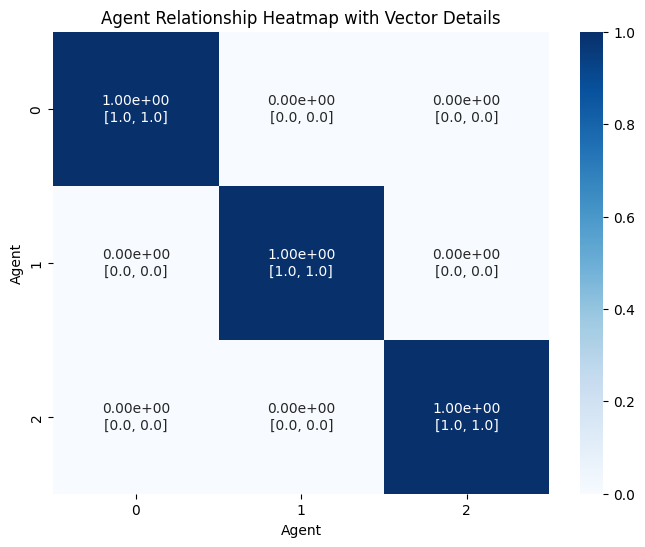

In [8]:
plot_matching(p, q, output)

### compare

In [44]:
from primal_loss import compute_t

In [19]:
from efficiency_loss import compute_efficiency_loss

In [20]:
from utils import da_with_t

In [ ]:
p = torch.tensor([[[0.6, 0.3, 1], [1, 0.5, 0], [0.3, 0, 1]]]).to(device)
q = torch.tensor([[[0.5, 1.0, 0], [0, 1, 0.5], [0, 0.5, 1.0]]]).to(device)

In [192]:
p = torch.tensor([p]).to(device)
q = torch.tensor([q]).to(device)

In [193]:
da_with_t(p, q)

tensor([[[1., 0., 0.],
         [0., 0., 1.],
         [0., 1., 0.]]], device='mps:0')

In [194]:
model_output = model(p, q)
model_efficiency_loss = compute_efficiency_loss(cfg, model_output, p, q)
model_stability_loss = compute_t(model_output, p, q).mean()
model_sp_loss = compute_spv_w(cfg, model, model_output, p, q).mean()

da_output = da_with_t(p, q)
da_efficiency_loss = compute_efficiency_loss(cfg, da_output, p, q)
da_stability_loss = compute_t(da_output, p, q).mean()
da_sp_loss = compute_spv_w(cfg, da_with_t, da_output, p, q).mean()

In [195]:
print(f"p:{p}")
print(f"q:{q}")
print("\nModel Results:")
print(f"  Output: {model_output}")
print(f"  Efficiency Loss: {model_efficiency_loss}")
print(f"  Stability Loss: {model_stability_loss}")
print(f"  SP Loss: {model_sp_loss}")

print("\nDA Results:")
print(f"  Output: {da_output}")
print(f"  Efficiency Loss: {da_efficiency_loss}")
print(f"  Stability Loss: {da_stability_loss}")
print(f"  SP Loss: {da_sp_loss}")

p:tensor([[[0.5000, 0.1667, 0.3333],
         [0.3333, 0.5000, 0.1667],
         [0.3333, 0.5000, 0.1667]]], device='mps:0')
q:tensor([[[0.4000, 0.2000, 0.4000],
         [0.4000, 0.2000, 0.4000],
         [0.4000, 0.4000, 0.2000]]], device='mps:0')

Model Results:
  Output: tensor([[[9.3796e-01, 1.4272e-05, 6.2023e-02],
         [6.7026e-02, 1.3577e-03, 9.3162e-01],
         [4.1644e-04, 9.9931e-01, 2.7459e-04]]], device='mps:0',
       grad_fn=<DivBackward0>)
  Efficiency Loss: -3.0134499073028564
  Stability Loss: 0.19931083917617798
  SP Loss: 0.05522657558321953

DA Results:
  Output: tensor([[[1., 0., 0.],
         [0., 0., 1.],
         [0., 1., 0.]]], device='mps:0')
  Efficiency Loss: -3.0
  Stability Loss: 0.20000000298023224
  SP Loss: 0.0


## patterns_2_1
受け手の選好は必ず二つの同等に好ましい提案者と、好ましくない一人の提案者となる

提案側の選考はランダムな強選好

In [153]:
from utils import normalize_tuples

In [182]:
one_tie_2_1 = list(set(itertools.permutations([2, 2, 1])))

In [183]:
no_tie_patterns = list(itertools.permutations([3, 2, 1]))

In [184]:
import random
random.seed(314)

one_tie_2_1 = normalize_tuples(one_tie_2_1)
no_tie_patterns = normalize_tuples(no_tie_patterns)
preference_list_p = list(itertools.product(no_tie_patterns, repeat=3))
preference_list_q = list(itertools.product(one_tie_2_1, repeat=3))
pairs = [(random.choice(preference_list_p), random.choice(preference_list_q)) for _ in range(1000)]
df_1 = pd.DataFrame(pairs, columns=['p', 'q'])

In [185]:
df_1

,p,q
0,"((0.5, 0.16666666666666666, 0.3333333333333333...","((0.4, 0.2, 0.4), (0.4, 0.2, 0.4), (0.4, 0.4, ..."
1,"((0.5, 0.3333333333333333, 0.16666666666666666...","((0.2, 0.4, 0.4), (0.4, 0.2, 0.4), (0.4, 0.4, ..."
2,"((0.5, 0.3333333333333333, 0.16666666666666666...","((0.4, 0.4, 0.2), (0.2, 0.4, 0.4), (0.4, 0.4, ..."
3,"((0.16666666666666666, 0.5, 0.3333333333333333...","((0.4, 0.2, 0.4), (0.2, 0.4, 0.4), (0.2, 0.4, ..."
4,"((0.5, 0.16666666666666666, 0.3333333333333333...","((0.4, 0.2, 0.4), (0.4, 0.2, 0.4), (0.2, 0.4, ..."
...,...,...
995,"((0.16666666666666666, 0.5, 0.3333333333333333...","((0.2, 0.4, 0.4), (0.2, 0.4, 0.4), (0.2, 0.4, ..."
996,"((0.3333333333333333, 0.5, 0.16666666666666666...","((0.4, 0.2, 0.4), (0.4, 0.2, 0.4), (0.4, 0.2, ..."
997,"((0.5, 0.16666666666666666, 0.3333333333333333...","((0.2, 0.4, 0.4), (0.4, 0.2, 0.4), (0.2, 0.4, ..."
998,"((0.16666666666666666, 0.3333333333333333, 0.5...","((0.2, 0.4, 0.4), (0.4, 0.2, 0.4), (0.4, 0.4, ..."


In [186]:
df_1 = apply_features(cfg, model, df_1)

Processing rows: 100%|██████████| 1000/1000 [01:18<00:00, 12.67it/s]


In [161]:
from utils import convert_to_float

In [187]:
df_1 = convert_to_float(df_1)

/Users/meina/Github/meina-t/matching_with_dl/utils.py:162: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df.applymap(try_convert)


In [188]:
df_1.describe()

,model_efficiency_loss,model_stability_loss,model_sp_loss,da_efficiency_loss,da_stability_loss,da_sp_loss
count,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.0
mean,-3.120458,0.150120,2.889323e-02,-2.890750,0.170672,0.0
std,2.827894,0.084341,5.687820e-02,2.767406,0.101627,0.0
min,-12.009266,0.000004,3.152915e-10,-12.000000,0.000000,0.0
25%,-4.849229,0.089006,1.290993e-04,-4.000000,0.088889,0.0
50%,-2.986352,0.140315,2.615902e-03,-2.000000,0.177778,0.0
75%,-0.345496,0.202257,3.310132e-02,0.000000,0.244444,0.0
max,2.921623,0.377654,4.392600e-01,0.000000,0.450000,0.0


In [191]:
p = df_1['p'][0]
q = df_1['q'][0]

## patterns2-2


In [139]:
one_tie_2_2 = list(set(itertools.permutations([2, 1, 1])))
no_tie_patterns = list(itertools.permutations([3, 2, 1]))

In [140]:
from random import choice
one_tie_2_2 = normalize_tuples(one_tie_2_2)
no_tie_patterns = normalize_tuples(no_tie_patterns)
preference_list_p = list(itertools.product(no_tie_patterns, repeat=3))
preference_list_q = list(itertools.product(one_tie_2_2, repeat=3))
pairs = [(choice(preference_list_p), choice(preference_list_q)) for _ in range(1000)]
df = pd.DataFrame(pairs, columns=['p', 'q'])

In [146]:
from utils import apply_features

In [147]:
df = apply_features(cfg, model, df)

Processing rows: 100%|██████████| 1000/1000 [01:08<00:00, 14.63it/s]


In [149]:
df = convert_to_float(df)

/Users/meina/Github/meina-t/matching_with_dl/utils.py:162: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.


In [150]:
df.describe()

,model_efficiency_loss,model_stability_loss,model_sp_loss,da_efficiency_loss,da_stability_loss,da_sp_loss
count,1000.000000,1.000000e+03,1.000000e+03,1000.000000,1000.000000,1000.0
mean,-1.158346,1.516044e-01,3.757371e-02,-1.318750,0.166285,0.0
std,1.997332,8.634095e-02,7.788224e-02,1.993975,0.102561,0.0
min,-8.999909,5.121932e-07,8.617967e-10,-9.000000,0.000000,0.0
25%,-1.998424,8.359600e-02,9.802159e-05,-2.000000,0.083333,0.0
50%,-0.050492,1.664441e-01,1.639004e-03,0.000000,0.166667,0.0
75%,0.000711,2.133432e-01,3.409407e-02,0.000000,0.243056,0.0
max,4.836687,3.742378e-01,6.098632e-01,1.000000,0.472222,0.0


In [151]:
df.head()

,p,q,model_efficiency_loss,model_stability_loss,model_sp_loss,da_efficiency_loss,da_stability_loss,da_sp_loss
0,"((0.16666666666666666, 0.3333333333333333, 0.5...","((0.5, 0.25, 0.25), (0.5, 0.25, 0.25), (0.25, ...",-5.998079,0.083392,0.000075,-3.75,0.208333,0.0
1,"((0.5, 0.3333333333333333, 0.16666666666666666...","((0.25, 0.25, 0.5), (0.5, 0.25, 0.25), (0.25, ...",-1.991758,0.083701,0.000215,-2.00,0.083333,0.0
2,"((0.16666666666666666, 0.3333333333333333, 0.5...","((0.5, 0.25, 0.25), (0.25, 0.25, 0.5), (0.25, ...",-5.755070,0.143429,0.011078,-6.00,0.138889,0.0
3,"((0.3333333333333333, 0.5, 0.16666666666666666...","((0.5, 0.25, 0.25), (0.5, 0.25, 0.25), (0.25, ...",-0.003272,0.110758,0.000056,0.00,0.111111,0.0
4,"((0.3333333333333333, 0.16666666666666666, 0.5...","((0.25, 0.5, 0.25), (0.25, 0.5, 0.25), (0.5, 0...",0.008054,0.113442,0.000245,0.00,0.111111,0.0


## indifferent

In [164]:
full_tie_pattern = [(1, 1, 1)]
no_tie_patterns = list(itertools.permutations([3, 2, 1]))

full_tie_pattern = normalize_tuples(full_tie_pattern)
no_tie_patterns = normalize_tuples(no_tie_patterns)
preference_list_p = list(itertools.product(no_tie_patterns, repeat=3))
preference_list_q = list(itertools.product(full_tie_pattern, repeat=3))
pairs = [(random.choice(preference_list_p), random.choice(preference_list_q)) for _ in range(1000)]
df = pd.DataFrame(pairs, columns=['p', 'q'])

In [165]:
df = apply_features(cfg, model, df)

Processing rows: 100%|██████████| 1000/1000 [02:19<00:00,  7.16it/s]


In [166]:
df = convert_to_float(df)

/Users/meina/Github/meina-t/matching_with_dl/utils.py:162: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.


In [167]:
df.describe()

,model_efficiency_loss,model_stability_loss,model_sp_loss,da_efficiency_loss,da_stability_loss,da_sp_loss
count,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000
mean,-9.528690,0.129895,1.817858e-02,-8.700500,0.147889,0.018444
std,4.291469,0.087515,2.884684e-02,4.221537,0.095334,0.034344
min,-15.997853,0.000018,9.082012e-09,-16.000000,0.000000,0.000000
25%,-11.999037,0.109991,1.448882e-04,-12.000000,0.111111,0.000000
50%,-10.647566,0.112440,2.478159e-03,-9.000000,0.166667,0.000000
75%,-7.835713,0.219065,2.620166e-02,-6.000000,0.222222,0.055556
max,0.044759,0.333414,1.645250e-01,0.000000,0.333333,0.111111


In [175]:
p = df['p'][7]
q = df['q'][7]